# **Problem Statement: Crop Yield Prediction and Crop Rotation**

This project focuses on predicting crop yields based on various environmental and soil parameters using machine learning techniques. It aims to help farmers and agricultural stakeholders make informed decisions by providing accurate yield forecasts and crop recommendations tailored to specific conditions.


# 📑 Table of Contents

### [Section 1: Loading Dataset](#load_data)
### [Section 2: Data Preprocessing](#preprocessing)
### [Section 3: EDA (Exploratory Data Analysis)](#eda)
### [Section 4: Feature Engineering](#feature_engineering)
### [Section 5: Model Building](#model_building)

<a id='load_data'></a>
# 📂 Section 1: Loading Dataset

In [2]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset

crop_df = pd.read_csv("E:\Inheritance\Crop_recommendationV2.csv")

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\mkjai\AppData\Local\Temp\ipykernel_14068\1634577954.py:3: SyntaxWarning: invalid escape sequence '\I'
  crop_df = pd.read_csv("E:\Inheritance\Crop_recommendationV2.csv")


<a id='preprocessing'></a>
# 📂 Section 2: Data Preprocessing

In [4]:
# dataset shape

print("Dataset Shape:", crop_df.shape)

Dataset Shape: (2200, 23)


This dataset has 2200 rows and 23 columns

In [5]:
# dataset information

print(crop_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [6]:
# top 5 records

print(crop_df.head())

    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308        188.194958             1   
1     16

Dataset Description:

- **N (ppm)**: Nitrogen concentration in the soil.
- **P (ppm)**: Phosphorus concentration in the soil.
- **K (ppm)**: Potassium concentration in the soil.
- **Temperature (°C)**: Ambient temperature at the farm.
- **Humidity (%)**: Relative humidity in the environment.
- **pH**: Acidity or alkalinity of the soil.
- **Rainfall (mm)**: Total rainfall received at the location.
- **Soil Moisture (%)**: Percentage of water content in the soil.
- **Soil Type**:
  - 1 = Sandy  
  - 2 = Loamy  
  - 3 = Clay
- **Sunlight Exposure (hrs/day)**: Average daily sunlight received.
- **Wind Speed (km/h)**: Wind velocity at the site.
- **CO₂ Concentration (ppm)**: Atmospheric carbon dioxide levels.
- **Organic Matter (%)**: Proportion of organic content in the soil.
- **Irrigation Frequency (times/week)**: Number of times irrigation is applied weekly.
- **Crop Density (plants/m²)**: Number of plants per square meter.
- **Pest Pressure (index)**: Indicator of pest infestation severity.
- **Fertilizer Usage (kg/ha)**: Fertilizer applied per hectare of land.
- **Growth Stage**:
  - 1 = Seedling  
  - 2 = Vegetative  
  - 3 = Flowering
- **Urban Area Proximity (km)**: Distance from the farm to the closest urban area.
- **Water Source Type**:
  - 1 = River  
  - 2 = Groundwater  
  - 3 = Recycled
- **Frost Risk (index)**: Index representing risk of frost.
- **Water Usage Efficiency (L/kg)**: Liters of water used per kilogram of crop yield.
- **Label**: Target variable indicating the crop type.


In [7]:
# dataset statistical summary

columns_to_exclude = ['soil_type', 'growth_stage', 'water_source_type']

numerical_df = crop_df.select_dtypes(include=['number']).drop(columns=columns_to_exclude)
print("Stastical summary", numerical_df.describe())

Stastical summary                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  soil_moisture  sunlight_exposure  \
count  2200.000000  2200.000000    2200.000000        2200.000000   
mean      6.469480   103.463655      20.151388           8.570609   
std       0.773938    54.958389       5.793720           1.999382   
min       3.504752    20.211267      10

The dataset contains agricultural samples with a wide range of values across soil, climate, crop, and management features. Key variables like nitrogen (N), phosphorus (P), potassium (K), and rainfall show high variability, indicating diverse agricultural conditions. Most variables have well-distributed values, with no extreme skewness. Overall, the data appears comprehensive and suitable for modeling crop growth, soil health, or precision agriculture practices.

### 🔍 Potential Data Anomalies 

- 🔺 **Potassium levels in the soil** are unusually high in some cases — a few samples show values more than **4 times higher than what's typical**, which may indicate incorrect entries or rare edge cases.

- ⚠️ **Phosphorus content** is also unexpectedly high in some records — this could lead to nutrient imbalance or may be due to inconsistent measurement.

- 📈 **Nitrogen values** are higher than expected in several samples — this could affect crop recommendations if not handled properly.

- ❄️ **Temperature in some entries is below 9°C**, which is quite low for growing most crops — might be a mistake or represent a rare cold-climate situation.

- ⚠️ **Soil pH levels** go as low as 3.5 and as high as 9.9 — most crops prefer a pH between 5.5 and 7.5, so these values may cause poor crop growth or reflect data issues.

- 🌧️ **Rainfall** in some areas goes up to nearly **300 mm**, which is **three times the normal amount** — this could indicate heavy monsoon zones or data errors.

- 🐛 **Pest pressure** ranges from nearly zero to maximum — while it’s possible, such wide variation may include unrealistic entries and should be double-checked.


In [8]:
# finding anomalies

from sklearn.ensemble import IsolationForest

features = crop_df.drop(columns=['label'])

iso = IsolationForest(contamination=0.02)
crop_df['anomaly'] = iso.fit_predict(features)

crop_df['anomaly_score'] = iso.decision_function(features)

crop_df['anomaly'].value_counts()

anomaly
 1    2156
-1      44
Name: count, dtype: int64

We analyzed 2,200 agricultural data records and found out that:
- 2,156 records (98%) were classified as normal and consistent with expected patterns.
- 44 records (2%) were flagged as anomalies, meaning they contain values that are highly unusual or unexpected.

So, we plan on removing those records for a better and stable results.

In [9]:
# removing anomalies

clean_crop_df = crop_df[crop_df['anomaly'] == 1].copy()

clean_crop_df = clean_crop_df.drop(columns=['anomaly'])

pd.set_option('display.max_columns', None)

print("Cleaned dataset shape:", clean_crop_df.shape)
clean_crop_df.head()

Cleaned dataset shape: (2156, 24)


,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,sunlight_exposure,wind_speed,co2_concentration,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency,anomaly_score
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,8.677355,10.109875,435.611226,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293,0.029038
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,5.754288,12.048050,401.451860,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672,0.047458
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,9.875230,9.051349,357.417963,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541,0.022674
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,8.023685,7.963606,363.694306,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341,0.027920
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,8.120512,19.264133,410.356458,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671,0.055943


In [10]:
# missing values

print("Missing Values:\n", clean_crop_df.isnull().sum())

Missing Values:
 N                         0
P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
soil_moisture             0
soil_type                 0
sunlight_exposure         0
wind_speed                0
co2_concentration         0
organic_matter            0
irrigation_frequency      0
crop_density              0
pest_pressure             0
fertilizer_usage          0
growth_stage              0
urban_area_proximity      0
water_source_type         0
frost_risk                0
water_usage_efficiency    0
anomaly_score             0
dtype: int64


From this we come to no that our dataset doesn't have null values and most of the datatypes are in integer and float format except the crop label which is of object datatype.

In [11]:
# duplicate rows

if clean_crop_df.duplicated().sum() != 0:
    print("Dataset has duplicate rows:", clean_crop_df.duplicated().sum())
else:
    print("No duplicate rows found.")

No duplicate rows found.


From this we can infer that there are no dulicate rows in our dataset.

<a id='eda'></a>
# 📂 Section 3: EDA (Exploratory Data Analysis)

### 🌾 Crop Label Distribution

This block of code visualizes the distribution of different crop labels in the dataset using a horizontal bar chart.
This helps us understand the class balance, whether the dataset is imbalanced or uniformly distributed across crop types.

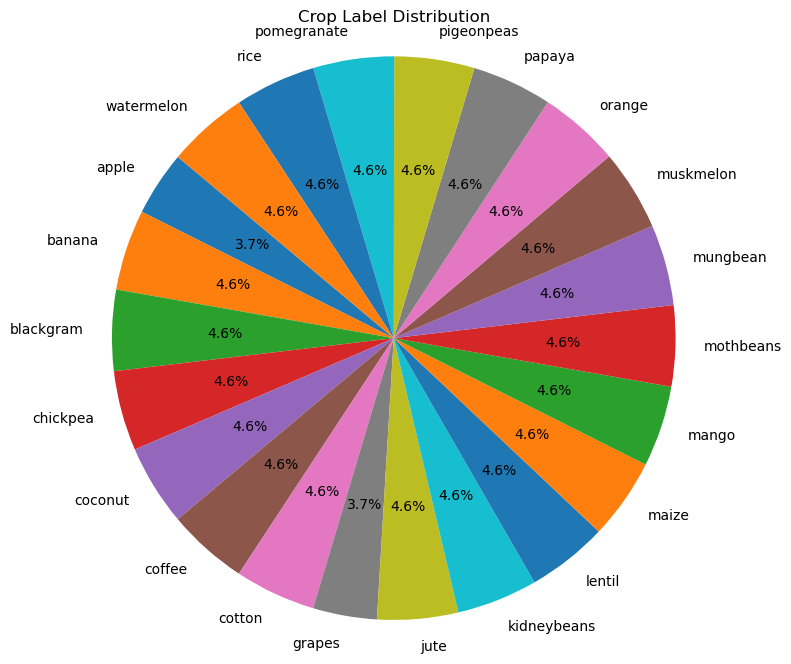

In [12]:
# crop label distribution

label_counts = clean_crop_df['label'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Crop Label Distribution")
plt.axis('equal')
plt.show()

From this graph we can infer that 22 unique crop labels each with mostly uniform distribution of records.

### 🔥 Correlation Heatmap Between Variables

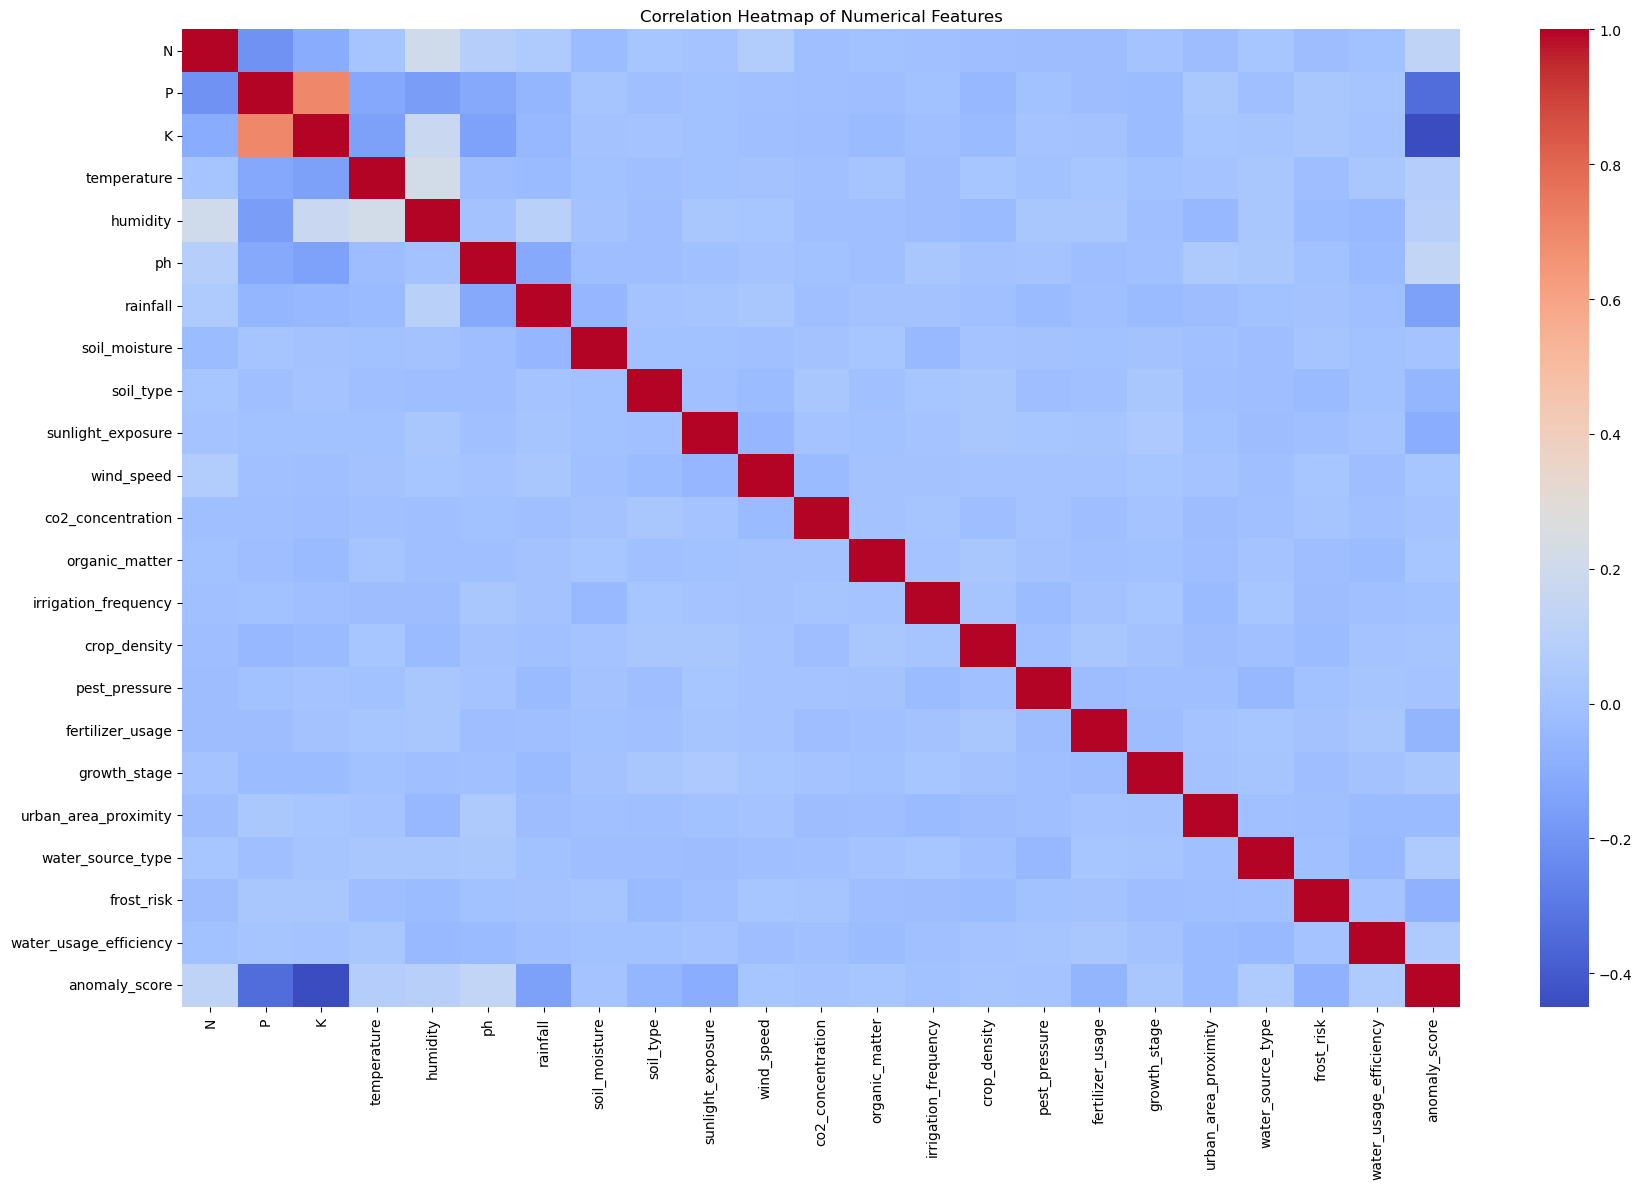

In [13]:
# correlation heatmap between the variables

plt.figure(figsize=(18, 12))
corr_matrix = clean_crop_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

- **Nitrogen and Phosphorus** are often applied together — when one increases, the other tends to increase too, indicating that farmers commonly use both nutrients in tandem.
- **Potassium** is somewhat related to Nitrogen and Phosphorus but still contributes its **own unique value**, especially in improving plant strength and quality.
- **Most other factors affecting crop growth** in this dataset (like temperature, humidity, pH, rainfall, sunlight, etc.) are **independent** of one another. 
- This is great news — it means we can **optimize nutrients, weather conditions, and farming practices separately**, without worrying about one change negatively affecting another.
- This independence helps us **better understand each factor’s role** in crop growth and improves the accuracy and effectiveness of crop prediction and recommendation models.
- **These factors are influenced by different things**  
   Temperature, rainfall, humidity, soil moisture, and pH each depend on separate natural processes or farming decisions. For example, rainfall doesn't always lead to more soil moisture because farmers use irrigation, and pH is often adjusted with soil treatments.
- **The data comes from varied regions and times**  
   Since the dataset includes samples from different locations and possibly different seasons, there’s no consistent pattern across these variables—so they don’t show strong correlations.

### 📊 Distribution Plots for Important Numerical Features

This section visualizes the distribution of selected key numerical features to understand their spread, skewness, and outliers.

The following features are chosen based on their importance in agriculture and crop growth:
- `N`, `P`, `K` (essential soil nutrients)
- `temperature`, `humidity` (climate conditions)
- `rainfall`, `soil_moisture` (water availability)
- `ph` (soil chemistry)
- `fertilizer_usage`, `crop_density` (agronomic inputs)


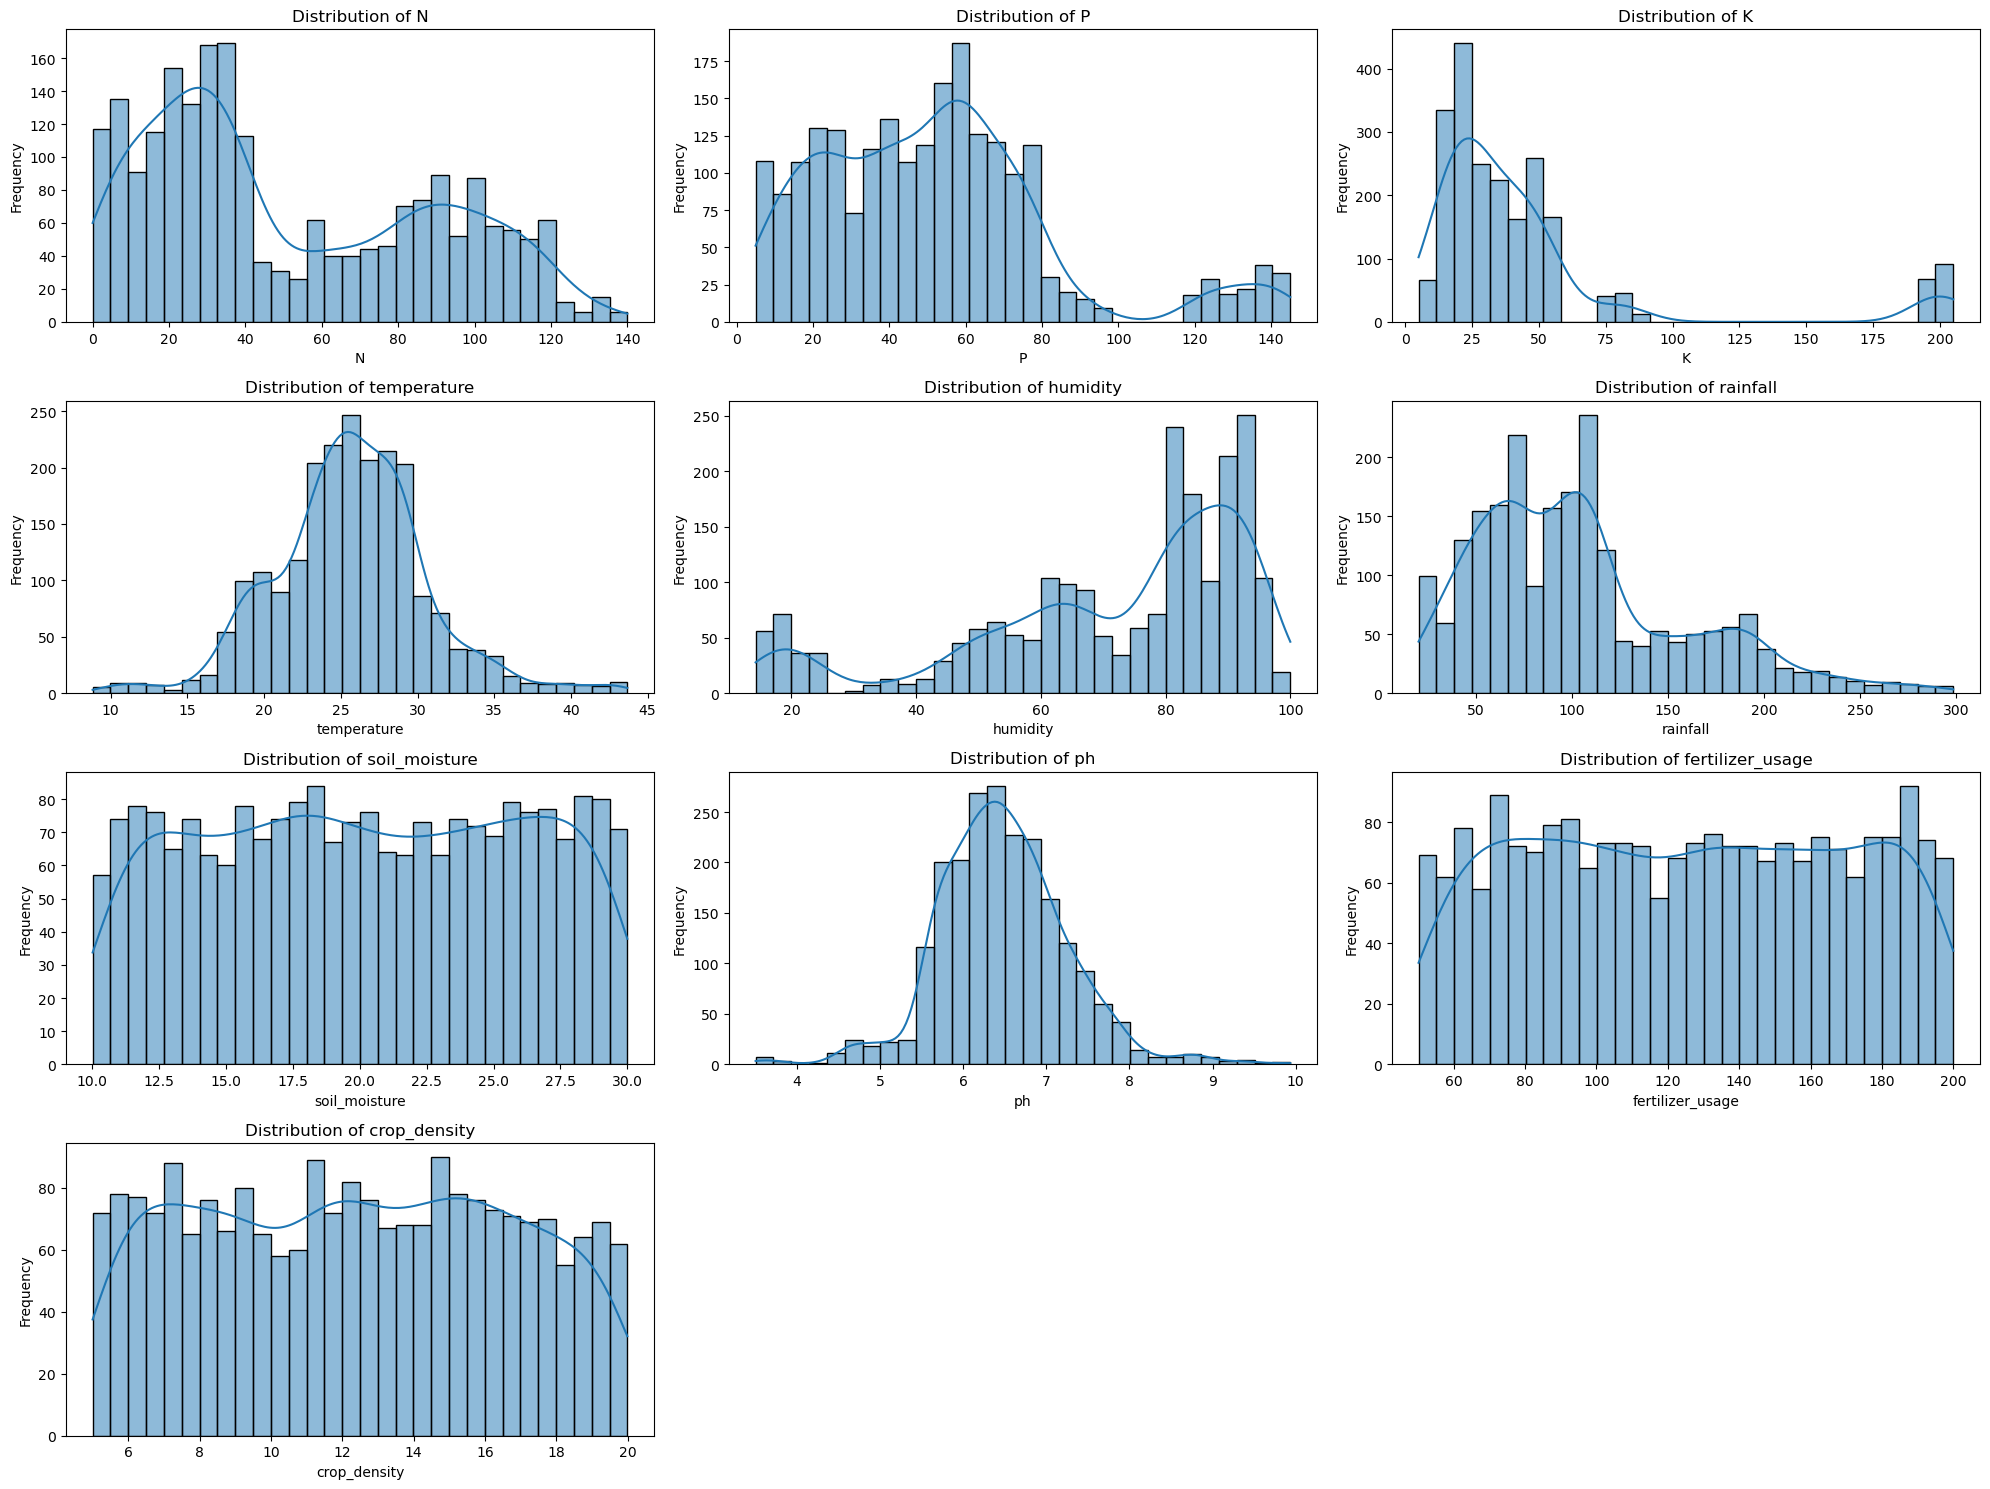

In [14]:
# distribution plots for features

import matplotlib.pyplot as plt
import seaborn as sns

important_features = [
    'N', 'P', 'K',
    'temperature', 'humidity',
    'rainfall', 'soil_moisture',
    'ph', 'fertilizer_usage', 'crop_density'
]

# Set up the subplot grid
plt.figure(figsize=(20, 15)) 

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.histplot(clean_crop_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Key Observations from Feature Distributions

**Nutrients (N, P, K)**
- **Nitrogen (N)**: Skewed left with a peak around 30–40; some high-value outliers.
- **Phosphorus (P)**: Fairly spread distribution with mild peaks, indicating variation in application.
- **Potassium (K)**: Strongly right-skewed; most values are low, but there are significant high-end outliers.

**Climate & Environment**
- **Temperature**: Near-normal distribution centered around 25°C, typical for crop growth.
- **Humidity**: Bimodal distribution; indicates data collected from both humid and dry regions.
- **Rainfall**: Slight right-skew; majority of values between 50–150 mm with a few high rainfall instances.
- **Soil Moisture**: Almost uniform distribution, suggesting well-managed irrigation or balanced sampling.

**Soil Properties**
- **pH**: Bell-shaped, normal distribution centered around pH 6.5, which is optimal for most crops.

**Crop Inputs & Growth**
- **Fertilizer Usage**: Fairly uniform spread between 50–200 units, showing varied usage across fields.
- **Crop Density**: Uniform distribution, suggesting a balanced spread of planting strategies across the dataset.


- Most variables are well-distributed and show natural or managed variability.
- Outliers in nutrient and rainfall data may need further inspection.
- Overall, the dataset appears suitable for training models with minimal feature bias.

This kind of analysis can help farmers:
- 🌱 Use resources more efficiently  
- 🌾 Grow healthier crops  
- 📈 Increase yields  
- 💰 Avoid unnecessary waste


### 📦 Outlier Detection Using Box Plots for Key Features

Box plots were used to visually identify outliers in the most important numerical features such as N, P, K, rainfall, and others. These visualizations help detect extreme values that may impact modeling or statistical analysis.


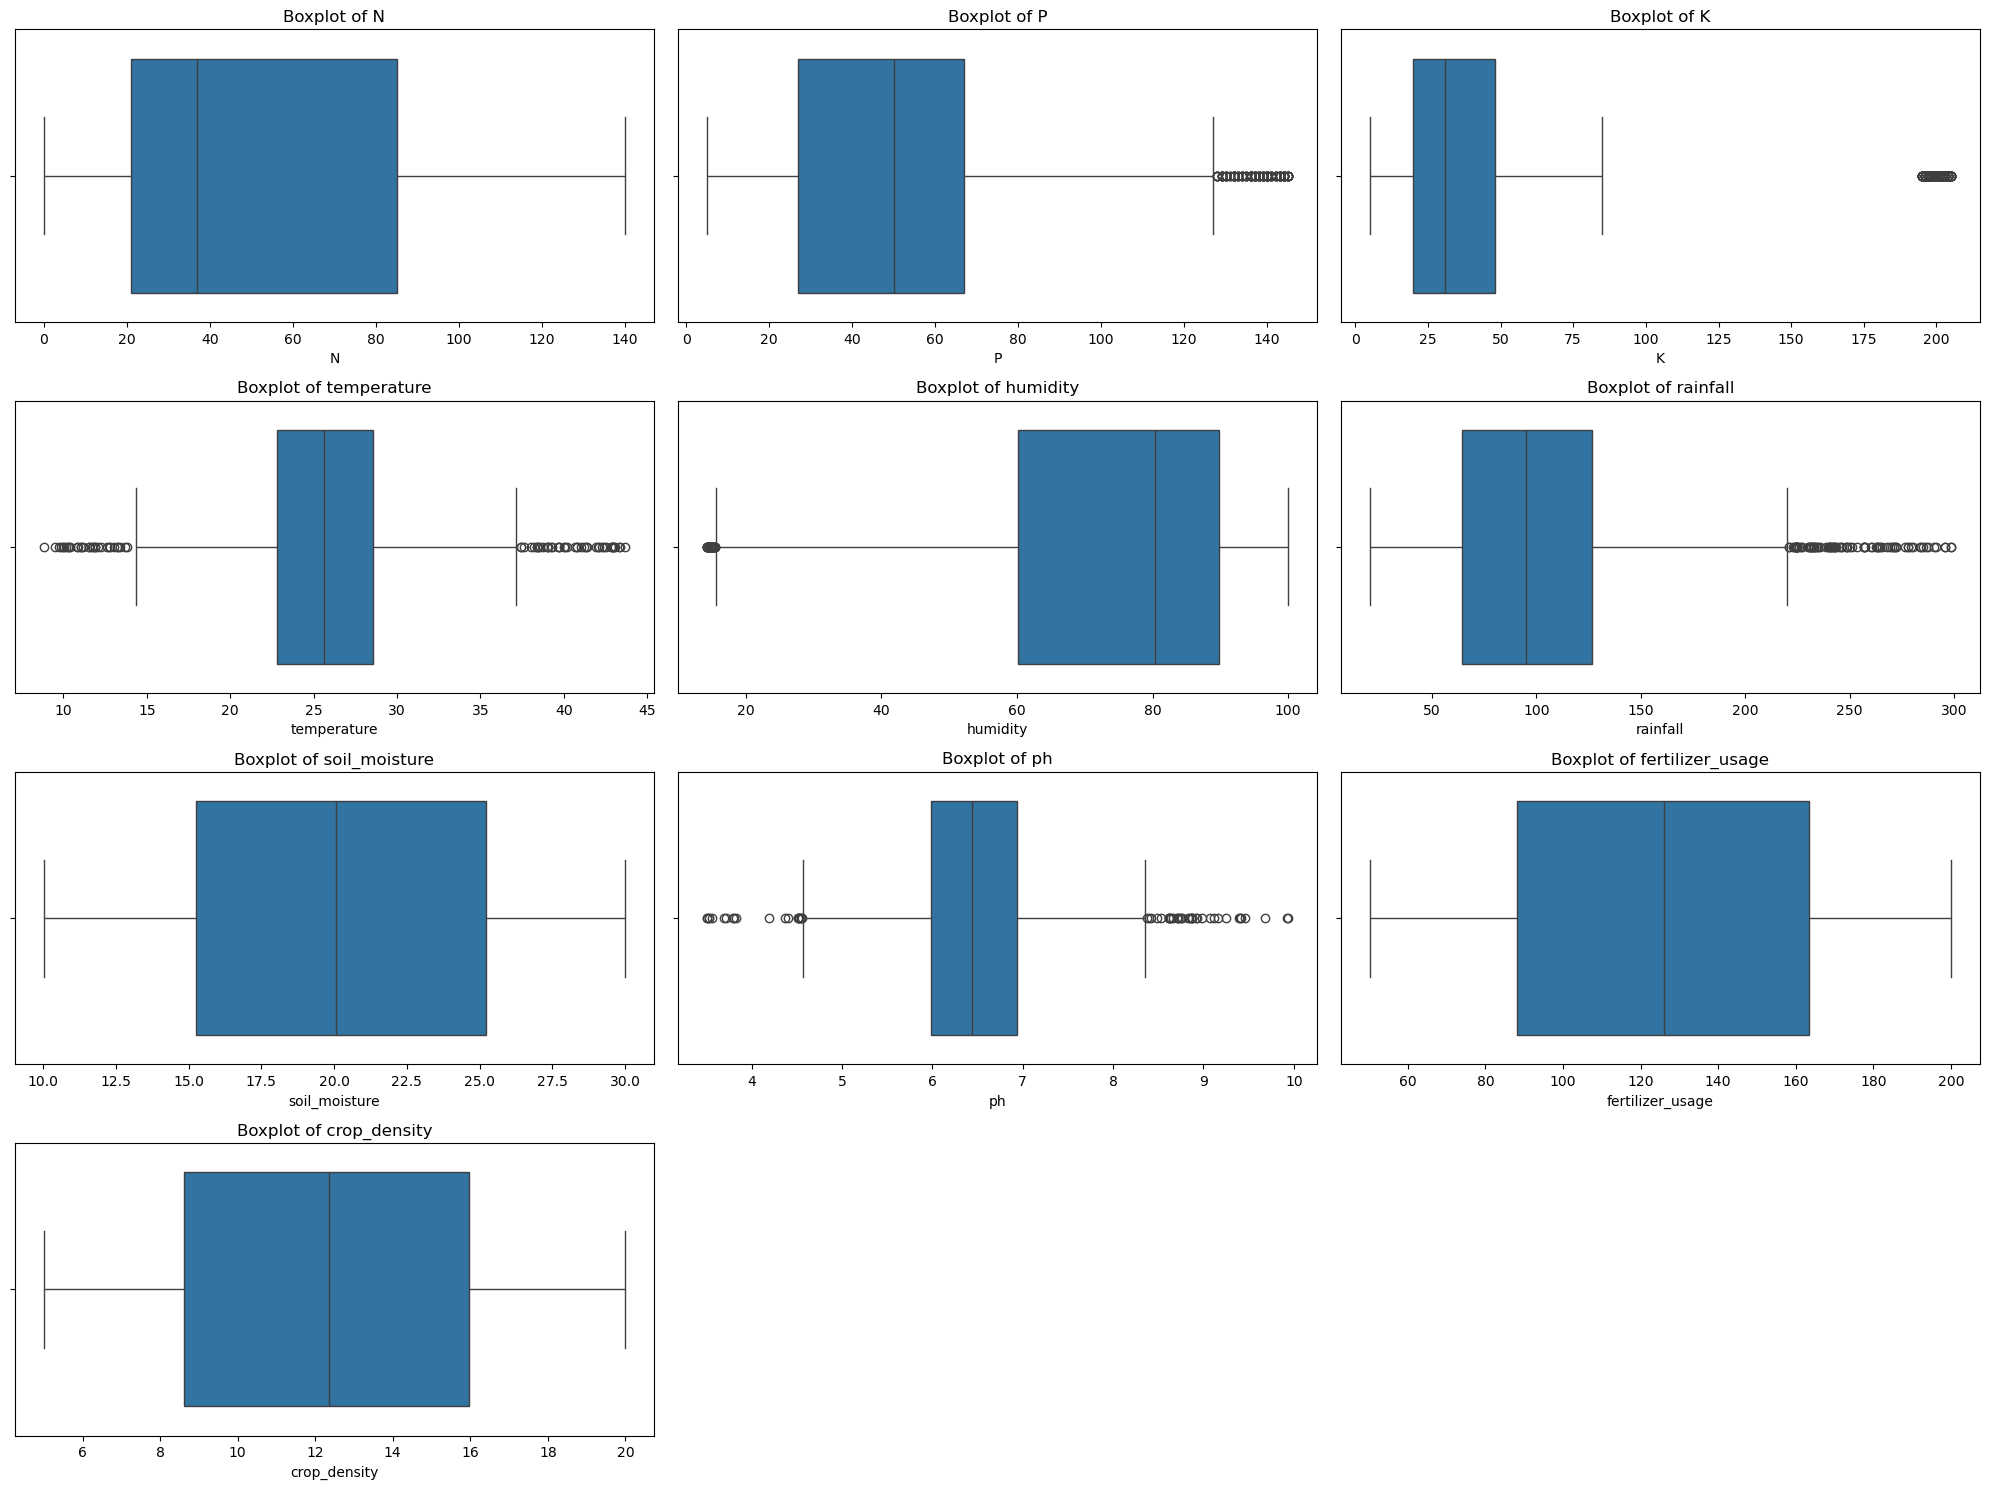

In [15]:
# boxplot for outlier detection

# Set up the subplot grid
plt.figure(figsize=(20, 15))

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=clean_crop_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Nutrients vs. Fertilizer Usage**
- Nitrogen (N), Phosphorus (P), and Potassium (K) show many **high-value outliers**, especially Potassium.
- These outliers align with the wide spread in **fertilizer usage**, suggesting that some fields are being over-supplemented.
- Implies potential over-fertilization or aggressive nutrient management in certain areas.

**Climate Factors and Soil Response**
- **Temperature** and **humidity** have minor outliers, but distributions are mostly stable.
- **Rainfall**, however, shows several extreme high values — likely representing **heavy rainfall zones**.
- Despite this, **soil moisture** remains balanced with no significant outliers — this supports the idea that **irrigation is being used effectively** to stabilize moisture regardless of climate.

**Soil pH Control**
- **pH** has a normal distribution with many outliers on both sides.
- This suggests that while most fields maintain optimal pH, a few have **very acidic or alkaline soil**, possibly due to natural conditions or insufficient treatment.

**Crop Density Consistency**
- **Crop density** is well-centered with no major outliers.
- Indicates that planting strategies are **uniform across regions**, even when environmental or soil conditions vary.

**Conclusion**
While the core dataset is well-behaved, outliers in nutrients and rainfall highlight areas for improvement in resource usage. Stable soil moisture and pH suggest strong field management, but **attention to extreme nutrient levels** may help reduce waste and improve sustainability.


### 🌾 Average N, P and K Levels by Crop Type

In [16]:
# N, P, K and Soil moisture of each type of crop

grouped = clean_crop_df.groupby('label')[['N', 'P', 'K']].mean().sort_values(by='N', ascending=False)
print("\nAverage N, P, K per Crop:\n", grouped)


Average N, P, K per Crop:
                       N           P           K
label                                          
cotton       117.770000   46.240000   19.560000
coffee       101.200000   28.740000   29.940000
muskmelon    100.320000   17.720000   50.080000
banana       100.230000   82.010000   50.050000
watermelon    99.420000   17.000000   50.220000
rice          79.890000   47.580000   39.870000
jute          78.400000   46.860000   39.990000
maize         77.760000   48.440000   19.790000
papaya        49.797980   58.969697   50.090909
chickpea      40.181818   67.686869   79.959596
blackgram     40.020000   67.470000   19.240000
grapes        23.430380  132.379747  199.924051
coconut       21.980000   16.930000   30.590000
apple         21.725000  133.137500  199.837500
mothbeans     21.440000   48.010000   20.230000
mungbean      20.990000   47.280000   19.870000
kidneybeans   20.750000   67.540000   20.050000
pigeonpeas    20.737374   67.686869   20.343434
mango       

<Figure size 1400x600 with 0 Axes>

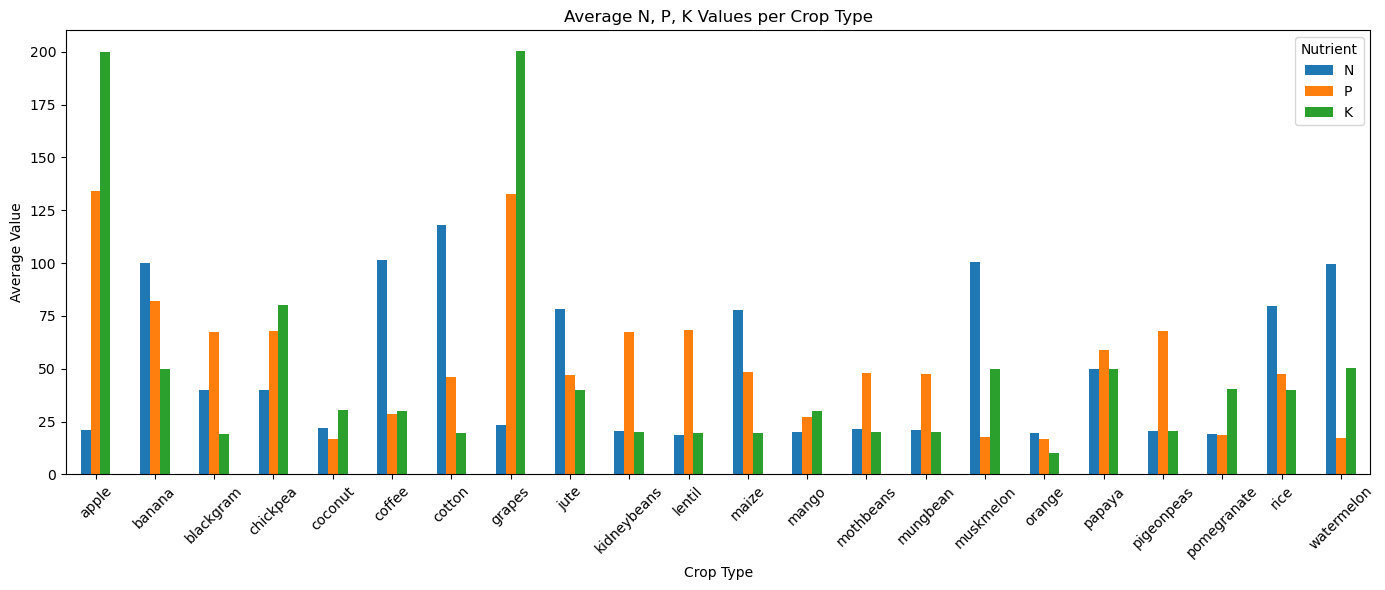

In [17]:
# visualization of average N, P, K values for each crop

npk_avg = crop_df.groupby('label')[['N', 'P', 'K']].mean()

plt.figure(figsize=(14, 6))
npk_avg.plot(kind='bar', figsize=(14, 6))
plt.title("Average N, P, K Values per Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()

Inference: Average N, P and K per Crop are:

**• High Nitrogen Crops:**  
Cotton, coffee, muskmelon, banana, and watermelon have high average nitrogen levels (>99), indicating their greater nitrogen demand for optimal growth.

**• High Phosphorus Crops:**  
Grapes (132.53) and apple (134.22) show the highest phosphorus needs by a large margin. These crops are phosphorus-intensive compared to others.

**• High Potassium Crops:**  
Grapes (200.11) and apple (199.89) again top the list for potassium requirements, followed by chickpea and papaya, reflecting their higher nutrient consumption.

**• Balanced Nutrient Crops:**  
Crops like rice, jute, and maize have moderately balanced NPK levels, making them easier to manage in standard soil conditions.

**• Low Nutrient Requiring Crops:**  
Crops such as pomegranate, orange, lentil, and mango require comparatively lower nitrogen and phosphorus levels, which may suit nutrient-deficient soils.

**• Unique Patterns:**  
- **Grapes and apple** stand out with exceptionally high P and K requirements.
- **Chickpea** shows an unusual mix: low N, high P, and high K.
- **Maize** has moderate N and low K, with the highest average soil moisture among all crops.


### 🌍 Distribution of Different Soil Types and Water Soures in the Dataset

The first pie chart illustrates the proportion of each soil type—**Sandy**, **Loamy**, and **Clay**—present in the dataset, helping to understand the dominant soil characteristics across the studied regions.

The second pie chart shows the proportion of water sources—**River**, **Groundwater**, and **Recycled**—used for irrigation, helping to understand agricultural dependence on various water resources.

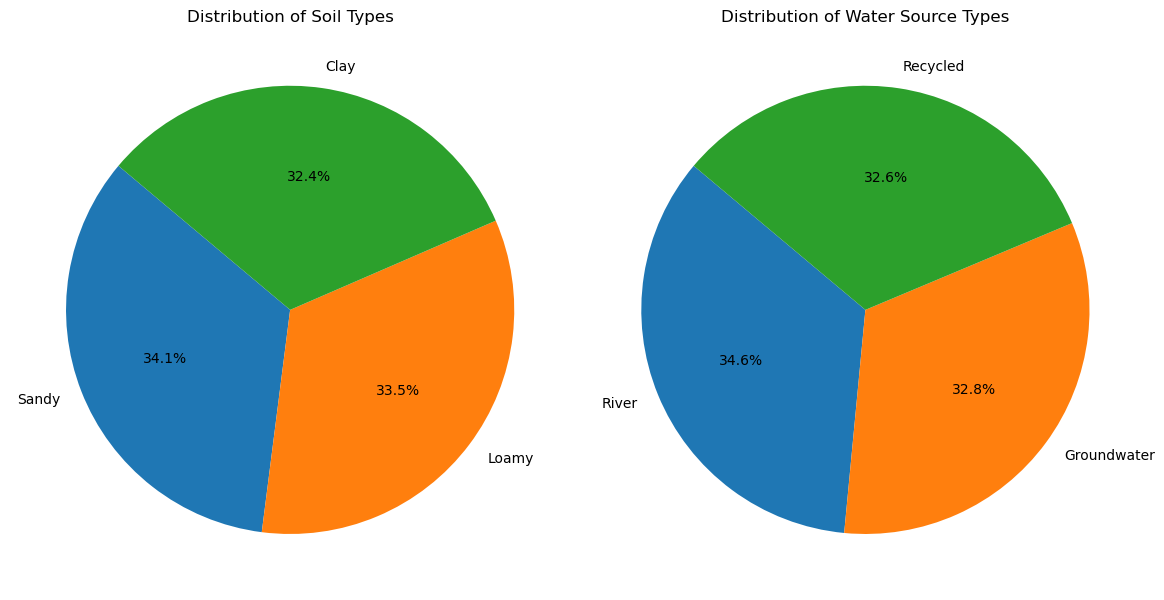

In [18]:
soil_counts = clean_crop_df['soil_type'].value_counts()
soil_labels = ['Sandy', 'Loamy', 'Clay']

water_counts = clean_crop_df['water_source_type'].value_counts()
water_labels = ['River', 'Groundwater', 'Recycled']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Soil Type Distribution Pie Chart
axes[0].pie(soil_counts, labels=soil_labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Distribution of Soil Types")

# Water Source Distribution Pie Chart
axes[1].pie(water_counts, labels=water_labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Distribution of Water Source Types")

plt.tight_layout()
plt.show()


I observed that approximately **34% of the water used is sourced from rivers**, and a similar **34% of the soil is sandy**. This close alignment suggests that a large number of crops may be grown **in regions near rivers**, where **sandy soils are naturally more prevalent**.

Additionally, the near-equal distribution of **clay, loamy, and sandy soils**, along with a balanced mix of **river, groundwater, and recycled water**, shows that **farming practices are well distributed across diverse environments**. 

This indicates:
- Farmers are adapting to local resources.
- There is **no over-dependence** on a single water or soil type.
- Agricultural planning may be **region-specific and resource-aware**, which supports sustainable farming.



### 🌦️ Average Temperature, Humidity, and Rainfall by Crop Type

This bar chart visualizes the average environmental conditions—**temperature**, **humidity**, and **rainfall**—associated with each crop type in the dataset, offering insights into their preferred growing conditions.


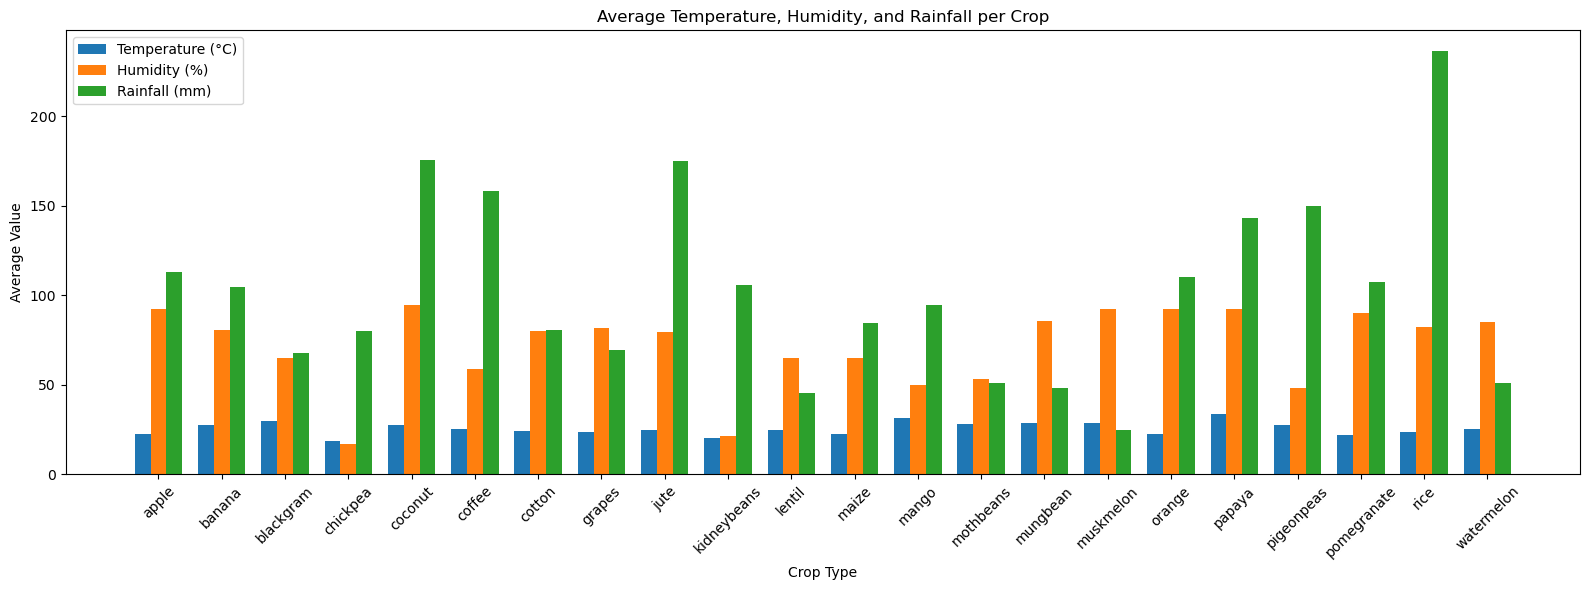

In [19]:
# average temperature, humidity and rainfall for each crop

avg_env = clean_crop_df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()

labels = avg_env['label']
temperature = avg_env['temperature']
humidity = avg_env['humidity']
rainfall = avg_env['rainfall']

x = np.arange(len(labels))  
width = 0.25  

plt.figure(figsize=(16, 6))
plt.bar(x - width, temperature, width, label='Temperature (°C)')
plt.bar(x, humidity, width, label='Humidity (%)')
plt.bar(x + width, rainfall, width, label='Rainfall (mm)')

plt.xlabel('Crop Type')
plt.ylabel('Average Value')
plt.title('Average Temperature, Humidity, and Rainfall per Crop')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the bar chart, we can draw the following observations:

- **Rice** requires the highest amount of rainfall, indicating it is a highly water-dependent crop, typically grown in regions with heavy precipitation.
- **Papaya**, **pomegranate**, and **pigeonpeas** also show high rainfall needs, though less than rice.
- **Banana** and **muskmelon** have the highest average humidity requirements, suggesting their preference for more humid climates.
- **Orange**, **papaya**, and **muskmelon** are grown in relatively warmer climates (higher average temperatures).
- **Lentil**, **mungbean**, and **blackgram** require lower rainfall and relatively moderate temperature and humidity, indicating suitability for semi-arid regions.
- Most crops maintain a temperature range between **20°C–30°C**, showing a common requirement for warm growing conditions.

### 🌱 Average Fertilizer and Water Usage Efficiency by Crop Type

This line chart illustrates the average **fertilizer usage** and **water usage efficiency** for each crop type, offering insights into input optimization and resource management across different crops.


C:\Users\mkjai\AppData\Local\Temp\ipykernel_14068\3943114079.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_usage.index, rotation=45)


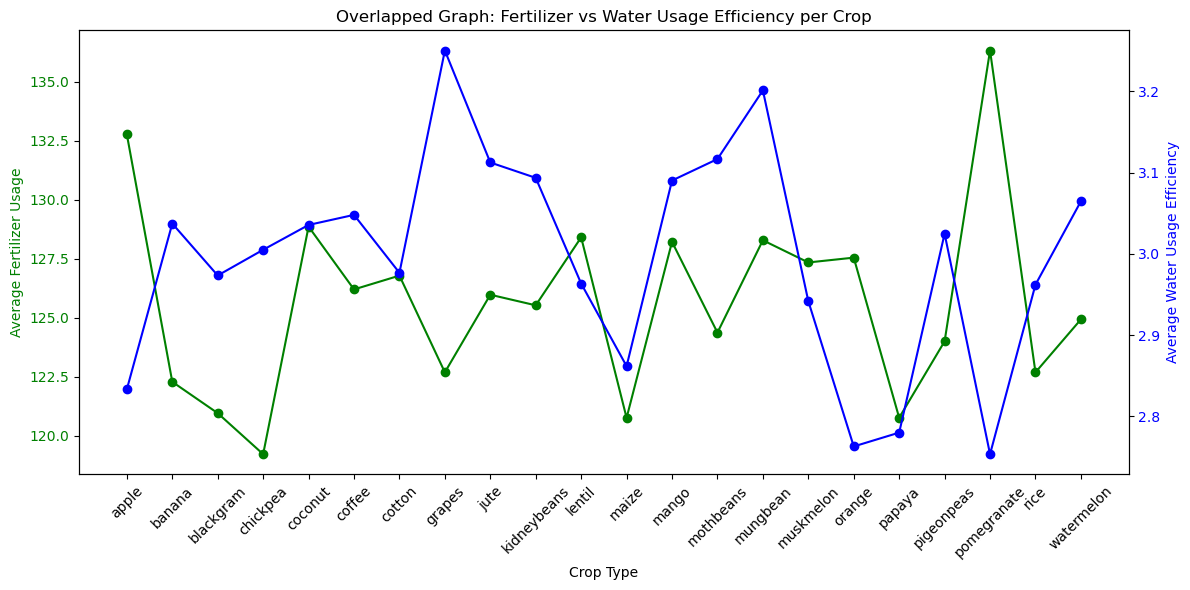

In [20]:
# average fertilized and water usage effecieny per crop

avg_usage = clean_crop_df.groupby('label')[['fertilizer_usage', 'water_usage_efficiency']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(avg_usage.index, avg_usage['fertilizer_usage'], color='green', marker='o', label='Fertilizer Usage')
ax1.set_xlabel("Crop Type")
ax1.set_ylabel("Average Fertilizer Usage", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(avg_usage.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(avg_usage.index, avg_usage['water_usage_efficiency'], color='blue', marker='o', label='Water Usage Efficiency')
ax2.set_ylabel("Average Water Usage Efficiency", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Overlapped Graph: Fertilizer vs Water Usage Efficiency per Crop")
fig.tight_layout()
plt.show()

**Fertilizer Usage**
- **Most crops** use fertilizer in a **similar average range**, indicating fairly balanced nutrient needs.
- **Pomegranate** stands out as it requires **significantly more fertilizer** than other crops — this crop needs special nutrient management.
- Crops like **chickpea, maize, and papaya** need **less fertilizer**, making them more **cost-effective** for resource-limited farmers.
- These insights help in **optimizing fertilizer budgets** and ensuring each crop gets what it needs without excess or waste.
- Farmers can use this to **allocate resources wisely**, ensuring both **crop health and cost-efficiency**.

**Water Usage**
- Most crops use water quite efficiently, with values clustered around a similar range.
- **Grapes and mungbeans** are **highly efficient** in using water — ideal for water-scarce regions.
- **Apple, pomegranate, orange, and maize** show **lower water efficiency**, meaning they may require more water to grow well.
- Crops like **banana, lentil, and watermelon** strike a **good balance** in water usage and can be considered reliable.
- This analysis helps **prioritize water-smart crops** during drought seasons and manage irrigation costs better.


### 🪲 Average Pest Pressure by Irrigation Frequency  
This line graph illustrates how pest pressure varies with different levels of irrigation frequency.

C:\Users\mkjai\AppData\Local\Temp\ipykernel_14068\2193155164.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


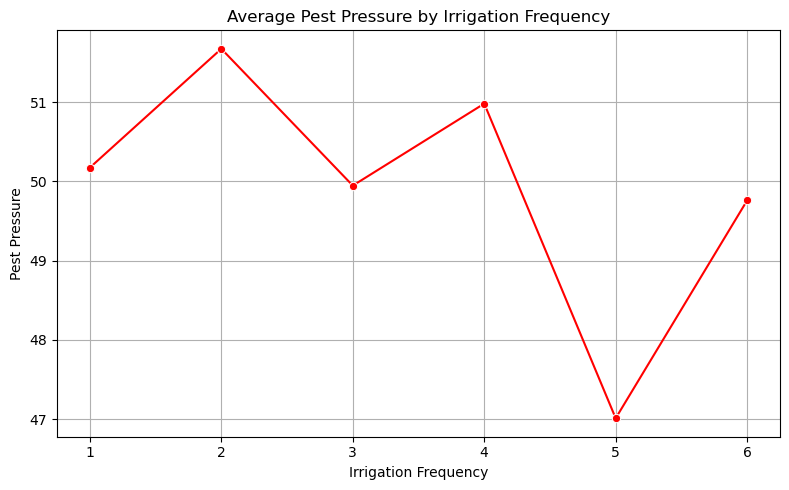

In [21]:
# average pest pressure by the irrigation frequency

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=clean_crop_df, x='irrigation_frequency', y='pest_pressure',
    estimator='mean', ci=None, marker='o', color='red'
)
plt.title("Average Pest Pressure by Irrigation Frequency")
plt.xlabel("Irrigation Frequency")
plt.ylabel("Pest Pressure")
plt.grid(True)
plt.tight_layout()
plt.show()


- **Moderate irrigation (around frequency 2)** may create ideal moist conditions for pests to thrive.
- **Increasing irrigation beyond frequency 2** might disturb pest habitat or wash away pest eggs/larvae, reducing pressure.
- However, **excessive irrigation** (frequency 6) might reverse this benefit slightly, possibly due to over-saturation effects on soil nutrients and plant health.

### 📌 Conclusion: Exploratory Data Analysis (EDA)

Our analysis provides meaningful insights into the agricultural data, helping us understand the field conditions, crop needs, and key challenges farmers might face:

- **Balanced Land and Water Conditions**  
   The dataset shows an almost equal distribution of sandy, loamy, and clay soils, as well as varied water sources like rivers, groundwater, and recycled water. This suggests that our data represents a wide range of real farming conditions, which is great for building a robust solution.

- **Each Crop Has Different Resource Needs**  
   Some crops require a lot of fertilizer, while others are more water-efficient. For example, pigeonpeas use the highest fertilizer, whereas grapes are the most water-efficient. These differences can help farmers choose crops based on available resources and minimize input costs.

- **Environmental Factors Are Independent**  
   Interestingly, variables like temperature, rainfall, humidity, and soil pH don't show strong connections with each other. This tells us that we should treat each of these factors separately when giving advice to farmers instead of assuming they work in a group.

- **Outliers Need Attention**  
   We observed some unusual values in nutrient levels and rainfall. These might indicate extreme conditions or errors in data collection and should be considered carefully when training prediction models to avoid misleading results.

- **Pest Pressure Is Linked to Irrigation**  
   Moderate irrigation seems to create the perfect environment for pests to thrive. However, both low and high irrigation levels tend to reduce pest pressure. This insight can help in planning irrigation to protect crops while still ensuring enough water supply.

- **Different Crops Thrive in Different Conditions**  
   Each crop prefers a specific combination of temperature, humidity, and rainfall. These environmental preferences should guide crop recommendations based on the local climate and seasonal conditions.


This analysis gives us a clear picture of what influences crop performance. The findings will help design smarter tools and recommendations that adapt to different environments, reduce unnecessary inputs, manage pest risks, and ultimately support farmers in making better decisions for improved productivity and sustainability.


<a id='feature_engineering'> </a>
# 📂 Section 4: Feature Engineering

## 🌟 Importance of Feature Engineering

Feature engineering is crucial for converting raw data into meaningful inputs that enhance model performance. It helps uncover hidden patterns, improves prediction accuracy, and ensures the model captures real-world context effectively.


In [22]:
# Derived Feature 1: Temperature-Humidity Index (THI) 
# THI = T - ((0.55 - 0.0055 * RH) * (T - 14.5)), where T = temperature (°C), RH = humidity (%)
clean_crop_df['Temperature-Humidity Index'] = clean_crop_df['temperature'] - (
    (0.55 - 0.0055 * clean_crop_df['humidity']) * (clean_crop_df['temperature'] - 14.5)
)

# Derived Feature 2: Nutrient Balance Ratio (NBR) 
# NBR = (N / (P + K + 1)), adding 1 to avoid division by zero
clean_crop_df['Nutrient Balance Ratio'] = clean_crop_df['N'] / (clean_crop_df['P'] + clean_crop_df['K'] + 1)

# Derived Feature 3: Water Availability Index (WAI) 
# WAI = 0.7 * Soil Moisture + 0.3 * Rainfall
clean_crop_df['Water Availability Index'] = 0.7 * clean_crop_df['soil_moisture'] + 0.3 * clean_crop_df['rainfall']

# Derived Feature 4: Photosynthesis Potential (PP) 
# PP = (Sunlight Exposure * CO2 Concentration * Temperature) normalized (0-1 scale)
# First, compute raw PP:
clean_crop_df['Raw_PP'] = clean_crop_df['sunlight_exposure'] * clean_crop_df['co2_concentration'] * clean_crop_df['temperature']
# Normalize between 0 and 1
clean_crop_df['Photosynthesis Potential'] = (clean_crop_df['Raw_PP'] - clean_crop_df['Raw_PP'].min()) / (clean_crop_df['Raw_PP'].max() - clean_crop_df['Raw_PP'].min())
clean_crop_df.drop(columns=['Raw_PP'], inplace=True)

# Derived Feature 5: Soil Fertility Index (SFI) 
# SFI = Organic Matter * (N + P + K) / 3
clean_crop_df['Soil Fertility Index'] = clean_crop_df['organic_matter'] * ((clean_crop_df['N'] + clean_crop_df['P'] + clean_crop_df['K']) / 3)

# Derived Feature 6: Nutrient Level (N + P + K)
clean_crop_df['Nutrient_Level'] = pd.cut(clean_crop_df['N'] + clean_crop_df['P'] + clean_crop_df['K'],
                                         bins=[0, 150, 300, 450],
                                         labels=['Low', 'Moderate', 'High'])

# Derived Feature 7: Soil Moisture Class
clean_crop_df['Soil_Moisture_Class'] = pd.cut(clean_crop_df['soil_moisture'],
                                              bins=[0, 15, 30, 100],
                                              labels=['Dry', 'Optimal', 'Wet'])

# Derived Feature 8: Frost Risk Level
clean_crop_df['Frost_Risk_Level'] = pd.cut(clean_crop_df['frost_risk'],
                                           bins=[-1, 33, 66, 100],
                                           labels=['Low', 'Medium', 'High'])

# Derived Feature 9: Urban Proximity Class
clean_crop_df['Urban_Proximity_Class'] = pd.cut(clean_crop_df['urban_area_proximity'],
                                                bins=[-1, 10, 30, np.inf],
                                                labels=['Near', 'Moderate', 'Remote'])

# Derived Feature 10: Irrigation Category
clean_crop_df['Irrigation_Category'] = pd.cut(clean_crop_df['irrigation_frequency'],
                                              bins=[-1, 1, 3, 7],
                                              labels=['Low', 'Moderate', 'High'])

In [23]:
# viewing the derived features

derived_features = [
    'Temperature-Humidity Index',
    'Nutrient Balance Ratio',
    'Water Availability Index',
    'Photosynthesis Potential',
    'Soil Fertility Index',
    'Nutrient_Level',
    'Soil_Moisture_Class',
    'Frost_Risk_Level',
    'Urban_Proximity_Class',
    'Irrigation_Category'
]

clean_crop_df[derived_features].head()


,Temperature-Humidity Index,Nutrient Balance Ratio,Water Availability Index,Photosynthesis Potential,Soil Fertility Index,Nutrient_Level,Soil_Moisture_Class,Frost_Risk_Level,Urban_Proximity_Class,Irrigation_Category
0,20.248245,1.046512,81.492906,0.306030,182.081346,Moderate,Optimal,High,Near,High
1,20.983493,0.850000,76.992489,0.163326,131.377284,Moderate,Dry,High,Near,High
2,22.177521,0.600000,99.744013,0.317352,78.173607,Moderate,Optimal,Low,Remote,Low
3,25.182520,0.973684,91.204623,0.297961,416.897390,Low,Optimal,High,Moderate,Low
4,19.560552,0.917647,98.580567,0.246998,280.923413,Moderate,Optimal,Low,Remote,Moderate


To enhance the quality of insights for crop rotation planning, we've engineered ten new features derived from the existing environmental and agricultural data. Each feature is designed to represent a critical aspect of crop growth conditions, resource availability, and environmental risks. Below is a brief explanation of what each feature represents and how it contributes to our crop rotation prediction model:

**1. Temperature-Humidity Index (THI)**  
**What it means:** This index combines temperature and humidity to estimate environmental heat stress.  
**Why it's useful:** Helps in assessing how comfortable or stressful the weather is for crop growth. Crops sensitive to heat can be rotated accordingly in high-THI zones.

**2. Nutrient Balance Ratio (NBR)**  
**What it means:** A ratio of Nitrogen (N) to the combined total of Phosphorus (P) and Potassium (K), ensuring balance in soil nutrients.  
**Why it's useful:** Imbalanced nutrient levels can lead to poor yields. This feature aids in deciding whether nutrient restoration crops (like legumes) should be rotated in.

**3. Water Availability Index (WAI)**  
**What it means:** A weighted index of soil moisture and rainfall, indicating overall water availability for crops.  
**Why it's useful:** Water-intensive crops can be rotated into regions with high WAI, while drought-tolerant crops can be planned for areas with low WAI.

**4. Photosynthesis Potential**  
**What it means:** A normalized value estimating the potential rate of photosynthesis using sunlight, CO₂, and temperature.  
**Why it's useful:** Highlights regions with high photosynthetic efficiency, enabling better crop selection for those conditions.

**5. Soil Fertility Index (SFI)**  
**What it means:** A composite index based on organic matter and nutrient levels (NPK).  
**Why it's useful:** Helps identify areas with high or low fertility, guiding decisions on where to plant high-demand crops vs. soil-rebuilding crops.

**6. Nutrient Level**  
**What it means:** A categorical indicator of total nutrient availability in the soil (Low, Moderate, High).  
**Why it's useful:** Simplifies nutrient evaluation and helps in selecting suitable crops that match the nutrient richness of the soil.

**7. Soil Moisture Class**  
**What it means:** Categorizes soil moisture into Dry, Optimal, and Wet classes.  
**Why it's useful:** Determines which crops are suited for current soil conditions—e.g., avoid planting water-sensitive crops in "Wet" zones.

**8. Frost Risk Level**  
**What it means:** Indicates the likelihood of frost occurrence (Low, Medium, High).  
**Why it's useful:** Helps avoid frost-sensitive crops in high-risk areas, minimizing yield loss and crop damage.

**9. Urban Proximity Class**  
**What it means:** Categorizes the distance from urban areas into Near, Moderate, and Remote.  
**Why it's useful:** Proximity affects accessibility, labor availability, and pollution risk. Useful in selecting crops suited for peri-urban vs. rural zones.

**10. Irrigation Category**  
**What it means:** Classifies irrigation frequency into Low, Moderate, and High.  
**Why it's useful:** Helps match crops with their water needs and the irrigation infrastructure already in place.


In [24]:
# Describe numerical features
print(clean_crop_df[derived_features].describe())

       Temperature-Humidity Index  Nutrient Balance Ratio  \
count                 2156.000000             2156.000000   
mean                    24.015552                0.681558   
std                      4.589950                0.567419   
min                      9.359422                0.000000   
25%                     21.742043                0.235113   
50%                     24.108175                0.500000   
75%                     26.696962                1.026147   
max                     42.569707                2.725490   

       Water Availability Index  Photosynthesis Potential  \
count               2156.000000               2156.000000   
mean                  45.228016                  0.350318   
std                   16.899942                  0.138195   
min                   13.947541                  0.000000   
25%                   32.923275                  0.247596   
50%                   42.043355                  0.335246   
75%                   5

Below is an interpretation of the statistical distribution of key derived features used in the crop rotation prediction model. These insights help in understanding the range, central tendency, and variability of the newly engineered variables.

**1. Temperature-Humidity Index (THI)**  
- **Mean:** 23.97 — The average environmental stress index indicates generally moderate conditions.  
- **Range:** 10.06 to 42.57 — Some regions experience high heat stress, which can affect crop suitability.  
- **Insight:** Crops can be matched to local THI conditions; heat-sensitive crops should avoid high-THI zones.

**2. Nutrient Balance Ratio (NBR)**  
- **Mean:** 0.68 — Indicates moderately balanced nutrient levels across most areas.  
- **Range:** 0.00 to 2.72 — Some regions have extreme imbalance, possibly due to high or low N, P, or K.  
- **Insight:** High variability suggests the need to adapt nutrient-specific crop rotation strategies.

**3. Water Availability Index (WAI)**  
- **Mean:** 45.21 — Reflects moderate water availability overall.  
- **Range:** 13.95 to 108.61 — There are zones with very high water access as well as water scarcity.  
- **Insight:** Enables water-adaptive crop planning—water-intensive crops can be allocated to high-WAI areas.

**4. Photosynthesis Potential**  
- **Mean:** 0.33 (on a 0–1 scale) — Suggests moderate to low potential for photosynthesis.  
- **Range:** 0.00 to 1.00 — Some regions show optimal conditions, others are less favorable.  
- **Insight:** Highly photosynthetic zones are ideal for light-dependent high-yield crops.

**5. Soil Fertility Index (SFI)**  
- **Mean:** 269.7 — Indicates healthy average soil fertility.  
- **Range:** 9.49 to 1051.68 — Large variation shows some fields are nutrient-rich while others need restoration.  
- **Insight:** High SFI areas can support demanding crops; low SFI areas may need soil improvement or fallow periods.

**Overall Interpretation:**  
These derived features capture diverse environmental and soil conditions across the dataset. Their broad value ranges highlight regional variability, making them critical inputs for data-driven crop rotation recommendations tailored to local conditions.


## 🧠 Encoding of Categorical Features

To make the derived categorical features usable for machine learning models, we performed encoding to convert them into numerical format. This step is essential because most models cannot directly interpret textual categories.

In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

ordinal_features = [
    'Nutrient_Level',
    'Soil_Moisture_Class',
    'Frost_Risk_Level',
    'Irrigation_Category'  # Assuming ordinal for now
]

nominal_features = [
    'Urban_Proximity_Class'
]

# Label Encoding for ordinal features
label_encoders = {}
for col in ordinal_features:
    le = LabelEncoder()
    clean_crop_df[col] = le.fit_transform(clean_crop_df[col])
    label_encoders[col] = le

# One-Hot Encoding for nominal features
clean_crop_df = pd.get_dummies(clean_crop_df, columns=nominal_features)


<a id='model_building'></a>
# 📂 Section 5: Model Building

### 🌾 Feature Importance for Crop Type Prediction

In this step, we aim to identify which input features are most influential in predicting the crop type.  
Here’s what this code does:
- We scale the features to standardize them.
- Train a Random Forest classifier to learn which features matter most.
- Extract and plot feature importance scores to see which factors most influence crop type prediction.

This chart tells a simple story:  
When we teach our model to predict which crop to grow, it learns by looking at many factors — like rainfall, humidity, soil nutrients, temperature, and pH.

The taller bars here mean these factors matter most:
- **Humidity and rainfall** tell us how wet the environment is.
- **N, P, K (Nitrogen, Phosphorus, Potassium)** show how rich the soil is.
- **Temperature and pH** help decide what can grow well.

By knowing which conditions truly influence crop choice, our model:
- Becomes simpler and faster.  
- Focuses only on what really matters, not on unnecessary data.  
- Helps us explain to farmers *why* it suggests a particular crop.

In short: instead of blindly predicting, our model learns to pay attention to the same factors an experienced farmer would — like rainfall, humidity, and soil health.

### 🔍 Step 1: Building & Training the Crop Recommendation Model

- Drops the target column **`label`** to create features (`X`) and keeps **`label`** as target (`y`).  
- Converts categorical crop labels into numeric form using **`LabelEncoder`**.  
- Splits the dataset into **training (80%)** and **testing (20%)** sets using stratified sampling for balanced class distribution.  
- Applies **`StandardScaler`** to normalize features, ensuring fair contribution of all variables.  
- Defines a set of models with hyperparameters:  
  - **RandomForestClassifier**  
  - **Support Vector Machine (SVM)**  
  - **Logistic Regression**  
  - **XGBoost**  
- Uses **`GridSearchCV`** (3-fold cross-validation) to tune hyperparameters and select the best-performing model.  
- Evaluates each model’s accuracy on the test set and prints the best one.  
- Returns the trained **best model**, **scaler**, **label encoder**, and **scaled train/test data** for later use.  

---

### 📊 Step 2: Model Evaluation & Reporting
- Prints the **best model name** and its accuracy.  
- Generates a **classification report** showing precision, recall, F1-score, and support for each crop class.  
- Ensures interpretability by reporting performance per crop type.  

---

### 🌐 Step 3: SHAP Explainability
- Uses **SHAP (SHapley Additive exPlanations)** to interpret the model’s decisions.  
- Creates an explainer (`shap.Explainer`) for the chosen best model.  
- Computes **SHAP values** on the test data.  
- Visualizes feature importance with a **SHAP summary plot**, highlighting which features most influence crop predictions.  

---

### 🏆 Output of the Function
The function returns:  
- ✅ **Best model** (RandomForest/SVM/LogisticRegression/XGBoost, whichever performs best)  
- ✅ **Scaler** (for preprocessing future input data)  
- ✅ **Label encoder** (to decode numeric predictions back to crop names)  
- ✅ **Scaled training & testing sets** (for further evaluation and recommendation tasks)  
### 🔍 Step 1: Building & Training the Crop Recommendation Model
- Drops the target column **`label`** to create features (`X`) and keeps **`label`** as target (`y`).  
- Converts categorical crop labels into numeric form using **`LabelEncoder`**.  
- Splits the dataset into **training (80%)** and **testing (20%)** sets using stratified sampling for balanced class distribution.  
- Applies **`StandardScaler`** to normalize features, ensuring fair contribution of all variables.  
- Defines a set of models with hyperparameters:  
  - **RandomForestClassifier**  
  - **Support Vector Machine (SVM)**  
  - **Logistic Regression**  
  - **XGBoost**  
- Uses **`GridSearchCV`** (3-fold cross-validation) to tune hyperparameters and select the best-performing model.  
- Evaluates each model’s accuracy on the test set and prints the best one.  
- Returns the trained **best model**, **scaler**, **label encoder**, and **scaled train/test data** for later use.  

---

### 📊 Step 2: Model Evaluation & Reporting
- Prints the **best model name** and its accuracy.  
- Generates a **classification report** showing precision, recall, F1-score, and support for each crop class.  
- Ensures interpretability by reporting performance per crop type.  

---

### 🌐 Step 3: SHAP Explainability
- Uses **SHAP (SHapley Additive exPlanations)** to interpret the model’s decisions.  
- Creates an explainer (`shap.Explainer`) for the chosen best model.  
- Computes **SHAP values** on the test data.  
- Visualizes feature importance with a **SHAP summary plot**, highlighting which features most influence crop predictions.  

---

### 🏆 Output of the Function
The function returns:  
- ✅ **Best model** (RandomForest/SVM/LogisticRegression/XGBoost, whichever performs best)  
- ✅ **Scaler** (for preprocessing future input data)  
- ✅ **Label encoder** (to decode numeric predictions back to crop names)  
- ✅ **Scaled training & testing sets** (for further evaluation and recommendation tasks)  


### ✅ Evaluating the Model

- Uses the trained model to predict crop labels on the test set
- Calculates and prints the accuracy score
- Generates a detailed classification report showing precision, recall, and F1-score
- Converts predicted numeric labels back to original crop names for clear interpretation


### 🌾 Getting Crop Recommendations

- Takes a crop name as input from the user
- Calculates average feature values (like environmental conditions) for each crop
- Scales these averages using the previously fitted scaler to keep consistency
- Computes similarity (Euclidean distance) between the input crop and all others
- Finds and prints the top 5 most similar crops (excluding the input crop itself)
- Shows a suitability score based on how close each recommended crop is


### ▶️ Running the Script (Main Execution)

- Checks if the cleaned dataset `clean_crop_df` is loaded and not empty  
- **Step 1:** Trains the crop recommendation model on the data  
- **Step 2:** Evaluates the model and prints performance metrics  
- **Step 3:** Gets user input and recommend similar crops  


**Crop Recommendation System – Results**

Our machine learning system was tested to identify the **best crop recommendation model** using multiple algorithms.  
The following results were observed:

- **Random Forest** emerged as the **best-performing model** with an accuracy of **99.5%**.  
- Other models like **XGBoost (98.8%)**, **SVM (94.4%)**, and **Logistic Regression (87.7%)** also performed well but were slightly less accurate.  
- This means the system can make highly reliable crop recommendations.

**Key Insights from Crop Predictions:**
- The model was tested across **22 different crops** (e.g., rice, maize, mango, papaya, coffee, cotton, etc.).  
- Overall classification performance was excellent, with near-perfect precision and recall for most crops.  
- For example, **papaya, banana, coconut, blackgram, and mungbean** were all predicted with very high reliability.

**Example – Recommendations for "Papaya":**
When a farmer inputs **Papaya** as the chosen crop, the system suggests the **Top 5 alternative/suitable crops** to follow:  
- **Blackgram** (Suitability Score: 0.24)  
- **Coconut** (0.23)  
- **Banana** (0.23)  
- **Jute** (0.23)  
- **Mungbean** (0.22)  

✅ This enables farmers to make **data-driven decisions** on **crop rotation and diversification**, ensuring better soil health, resource use, and profitability.

👉 In short: The system is **highly accurate** and provides **actionable crop recommendations** that can directly support farmers in planning their agricultural practices.


### 🔍 Feature Importance Visualization for Random Forest Model
This section highlights the **top features driving crop recommendation decisions** when the best model selected is a **Random Forest Classifier**.  
The feature importance values are displayed along with a bar plot of the top 10 features for stakeholder-friendly interpretation.


**🌱 What Drives the Crop Recommendation Model?**

Our Random Forest model highlights the **most important factors** influencing which crops are recommended for given conditions. The values below represent how strongly each factor contributes to the model’s decision-making.

**✅ Key Insights for Stakeholders:**
- **Rainfall (0.148) and Humidity (0.147)** are the **top two drivers**, showing that water availability is the most influential factor for crop suitability.  
- **Soil nutrients (K: 0.109, P: 0.102, N: 0.070)** also have a strong impact, emphasizing the role of soil fertility in determining crop success.  
- **Environmental stress factors** such as **Temperature (0.056)** and the **Temperature-Humidity Index (0.051)** influence the model, highlighting the importance of climate resilience.  
- **Indices like Water Availability (0.075) and Nutrient Balance (0.061)** show that the model considers **combined soil–climate conditions**, not just individual values.  
- Factors such as **pH, soil fertility, photosynthesis potential, and risk indicators** have lower importance but still contribute to fine-tuning recommendations.  

👉 **Takeaway for stakeholders**: The model prioritizes **water, nutrients, and climate conditions** as the key drivers for crop recommendations, ensuring practical and sustainable guidance for farmers and decision-makers.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import joblib

In [27]:
# =========================
# Feature Engineering
# =========================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def prepare_data(df):
    X = df.drop('label', axis=1)
    y = df['label']

    # Encode labels to integers for XGBoost compatibility
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    return X_train, X_test, y_train, y_test, scaler, encoder

X_train, X_test, y_train, y_test, scaler, encoder = prepare_data(crop_df)
print("Feature engineering complete. Train/Test split done.")



Feature engineering complete. Train/Test split done.


In [28]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [29]:
def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [30]:
from sklearn.metrics import log_loss, classification_report, accuracy_score
import numpy as np

def evaluate_model(model, X_test, y_test, le, clean_crop_df, feature_names, top_k=5):
    """
    Evaluate the model for top-5 crop ranking performance using clean_crop_df.
    Args:
        model: Trained model
        X_test: Test features
        y_test: Test labels (encoded)
        le: LabelEncoder to decode predictions
        clean_crop_df: Processed dataset with engineered features
        feature_names: List of feature names
        top_k: Number of top predictions to evaluate (default: 5)
    Returns: Dictionary with log loss, top-k accuracy, and classification report
    """
    try:
        # Get probabilities
        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        
        # Decode labels for classification report
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        
        # Compute log loss
        logloss = log_loss(y_test, y_pred_proba)
        
        # Compute standard accuracy and classification report
        accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
        report = classification_report(y_test_decoded, y_pred_decoded, output_dict=True, zero_division=0)
        
        # Compute top-k accuracy: check if true crop is in top k predictions
        top_k_accuracy = 0
        valid_samples = 0
        crop_means = clean_crop_df.groupby('label')[feature_names].mean().reset_index()
        missing_crops = []
        for idx, true_label in enumerate(y_test):
            true_crop = le.inverse_transform([true_label])[0]
            # Get mean features for the true crop
            crop_features = crop_means[crop_means['label'] == true_crop][feature_names]
            if not crop_features.empty:
                crop_proba = model.predict_proba(crop_features)[0]
                top_k_crops = le.inverse_transform(np.argsort(crop_proba)[-top_k:][::-1])
                if true_crop in top_k_crops:
                    top_k_accuracy += 1
                valid_samples += 1
            else:
                missing_crops.append(true_crop)
        # Avoid division by zero
        top_k_accuracy = top_k_accuracy / valid_samples if valid_samples > 0 else 0.0
        if missing_crops:
            print(f"Warning: Missing mean features for crops: {set(missing_crops)}")
        
        print(f"\n{model.__class__.__name__} Evaluation:")
        print(f"Log Loss: {logloss:.4f}")
        print(f"Top-{top_k} Accuracy: {top_k_accuracy:.4f} (based on {valid_samples} valid samples)")
        print(f"Standard Accuracy: {accuracy:.4f}")
        print(classification_report(y_test_decoded, y_pred_decoded, zero_division=0))
        
        results = {
            'log_loss': logloss,
            'top_k_accuracy': top_k_accuracy,
            'accuracy': accuracy,
            'report': report
        }
        print(f"evaluate_model results for {model.__class__.__name__}: {results}")
        return results
    
    except Exception as e:
        print(f"Error in evaluate_model for {model.__class__.__name__}: {str(e)}")
        return None

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models(models_results, metric='top_k_accuracy'):
    """
    Compare models based on a specified metric and plot results.
    Args:
        models_results: Dictionary of model names and evaluation results
        metric: Metric to compare (default: 'top_k_accuracy')
    Returns: DataFrame with comparison results
    """
    if not models_results:
        raise ValueError("models_results is empty. No models were evaluated successfully.")
    
    # Filter out invalid results (None or missing top_k_accuracy)
    valid_results = {
        name: results for name, results in models_results.items()
        if results is not None and 'top_k_accuracy' in results and results['top_k_accuracy'] is not None
    }
    if not valid_results:
        raise ValueError("No valid model results with top_k_accuracy available for comparison.")
    
    print(f"Valid models for comparison: {list(valid_results.keys())}")
    
    try:
        comparison = pd.DataFrame({
            'Model': [name for name in valid_results.keys()],
            'Log Loss': [results['log_loss'] for results in valid_results.values()],
            'Top-5 Accuracy': [results['top_k_accuracy'] for results in valid_results.values()],
            'Accuracy': [results['accuracy'] for results in valid_results.values()]
        })
        
        print("\nModel Comparison:")
        print(comparison.sort_values(by=metric, ascending=False))
        
        # Plot comparison
        plt.figure(figsize=(10, 6))
        sns.barplot(x=metric, y='Model', data=comparison.sort_values(by=metric, ascending=False), palette='viridis')
        plt.title(f'Model Comparison by {metric.replace("_", " ").title()}', fontsize=14)
        plt.xlabel(metric.replace("_", " ").title())
        plt.ylabel('Model')
        plt.tight_layout()
        plt.show()
        
        return comparison
    
    except Exception as e:
        print(f"Error in compare_models: {str(e)}")
        raise

In [32]:
def show_feature_importance(model, X, feature_names, top_n=10):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
        
        print(f"\n🌟 Feature Importance ({model.__class__.__name__}):")
        for feature, score in feature_importance.head(top_n).items():
            print(f"  - {feature}: {score:.3f}")
        
        # Plot top N features
        plt.figure(figsize=(8, 5))
        feature_importance.head(top_n).plot(kind='bar', color='forestgreen', edgecolor='black')
        plt.title(f"Top {top_n} Important Features ({model.__class__.__name__})", fontsize=14)
        plt.ylabel("Importance Score")
        plt.xlabel("Feature")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nℹ️ Feature importance not available for {model.__class__.__name__}.")

In [33]:

# =========================
# Model Building and Comparison
# =========================

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def train_models(X_train, y_train):
    models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),
        "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

def evaluate_models(models, X_test, y_test):
    scores = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        scores[name] = {"accuracy": acc, "f1_score": f1}
        print(f"{name} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
    return scores

def select_best_model(models, scores):
    best_model_name = max(scores, key=lambda x: scores[x]['f1_score'])
    print(f"Best model selected: {best_model_name}")
    return models[best_model_name]

# Training and evaluating
models = train_models(X_train, y_train)
scores = evaluate_models(models, X_test, y_test)
best_model = select_best_model(models, scores)


# =========================
# Example Prediction with Decoded Labels
# =========================
y_pred = best_model.predict(X_test[:5])             # Predict on first 5 test samples
decoded_preds = encoder.inverse_transform(y_pred)   # Convert back to crop names
print("Sample Predictions:", decoded_preds)



c:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForest -> Accuracy: 0.9977, F1-score: 0.9977
SVM -> Accuracy: 0.8886, F1-score: 0.8863
LogisticRegression -> Accuracy: 0.9682, F1-score: 0.9678
XGBoost -> Accuracy: 0.9932, F1-score: 0.9931
Best model selected: RandomForest
Sample Predictions: ['orange' 'banana' 'cotton' 'maize' 'orange']


In [34]:
# =========================
# Crop Rotation Predictor (Top-5, exclude input crop)
# =========================
def crop_rotation_predictor(crop_name, df, best_model, scaler, encoder, top_k=5):
    # Filter dataset rows for the given crop
    crop_data = df[df['label'] == crop_name].drop('label', axis=1)

    if crop_data.empty:
        print(f"Crop '{crop_name}' not found in dataset!")
        return

    # Take mean values of the crop's conditions
    avg_conditions = crop_data.mean().values.reshape(1, -1)

    # Scale using the same scaler
    avg_scaled = scaler.transform(avg_conditions)

    # Predict crop probabilities
    if hasattr(best_model, "predict_proba"):
        probs = best_model.predict_proba(avg_scaled)[0]
        top_indices = probs.argsort()[::-1]   # sorted high → low
        top_crops = encoder.inverse_transform(top_indices)

        # Remove the input crop itself
        filtered_crops = [c for c in top_crops if c != crop_name]

        # Take top_k excluding itself
        recommended = filtered_crops[:top_k]

        print(f"Given crop: {crop_name}")
        print(f"Top {top_k} recommended crops for rotation: {recommended}")
    else:
        print("This model does not support probability-based recommendations.")

# =========================
# Example usage
# =========================
user_crop = input("Enter a crop name: ").strip().lower()

# Match case-insensitive with dataset
valid_crops = [c.lower() for c in crop_df['label'].unique()]
if user_crop in valid_crops:
    # Map back to original crop name
    original_crop = crop_df['label'].unique()[valid_crops.index(user_crop)]
    crop_rotation_predictor(original_crop, crop_df, best_model, scaler, encoder)
else:
    print("Crop not found in dataset!")


Crop not found in dataset!


In [35]:
import joblib

# Save best model
joblib.dump(best_model, "crop_model.pkl")
print("Best model saved as crop_model.pkl")

joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(feature_columns, "features.pkl")


Best model saved as crop_model.pkl


NameError: name 'feature_columns' is not defined